**Major League Soccer Match Data**

In [1]:
#Downloading libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Connecting to drive and extracting teh csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/matches.csv"


In [230]:
mlsdata = pd.read_csv(file_path)

mlsdata['home'] = mlsdata['home'].replace('D.C. United', 'DC United')
mlsdata['home'] = mlsdata['home'].replace('Houston Dynamo', 'Houston Dynamo FC')
mlsdata['home'] = mlsdata['home'].replace('Columbus Crew SC', 'Columbus Crew')
mlsdata['home'] = mlsdata['home'].replace('Montreal Impact', 'CF Montréal')


mlsdata['away'] = mlsdata['away'].replace('D.C. United', 'DC United')
mlsdata['away'] = mlsdata['away'].replace('Houston Dynamo', 'Houston Dynamo FC')
mlsdata['away'] = mlsdata['away'].replace('Columbus Crew SC ', 'Columbus Crew')
mlsdata['away'] = mlsdata['away'].replace('Montreal Impact', 'CF Montréal')

#Making sure there are no team duplicates due to updated naming conventions
#In the MLS, there are currently 29 teams, but we have 30 because of Chivas USA
data = mlsdata[mlsdata['year'] >= 2012]
unique_teams = pd.concat([data['home'], data['away']]).unique()
num_teams = len(unique_teams)
print("Number of teams in the MLS:", num_teams)


Number of teams in the MLS: 30


<ipython-input-230-b4ad5b767e51>:1: DtypeWarning: Columns (11,14,50,102,123,125,129,131,133,135,137,139,141,143,145,147,149,157,158,160,161,163,165,167,169,171,173,184,186,187,205,206) have mixed types. Specify dtype option on import or set low_memory=False.
  mlsdata = pd.read_csv(file_path)


In [214]:
mlsdata.head(10)

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,"12,871",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dallas,Colorado,6/15/1996,1996,NaN,"9,704",Cotton Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Colorado,DC United,8/29/1996,1996,NaN,"6,368",Mile High Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LA Galaxy,New England,8/8/1996,1996,NaN,"10,251",Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,New England,DC United,7/20/1996,1996,NaN,"18,347",Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,DC United,Colorado,9/21/1996,1996,NaN,"20,573",Robert F. Kennedy Memorial Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Tampa Bay,Columbus,6/22/1996,1996,NaN,"8,767",Houlihan's Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,LA Galaxy,Dallas,8/25/1996,1996,NaN,"19,279",Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,DC United,Columbus,7/28/1996,1996,NaN,"11,173",Robert F. Kennedy Memorial Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,MetroStars,KC Wiz,6/26/1996,1996,NaN,"16,103",Giants Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
#Filtering out data
datefilter = mlsdata[(mlsdata['year'] >= 2012) & (mlsdata['attendance'].notna())]
datefilter.head(5)

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
3264,336076.0,Colorado Rapids,Columbus Crew SC,"Saturday, March 10",2012,23:00,"14,746","Dick's Sporting Goods Park, Denver",2012 USA Major League Soccer,Regular Season 2012,...,4.0,8.0,4.0,3.0,3.0,NaN,NaN,NaN,4-2-3-1,4-5-1
3265,336077.0,Vancouver Whitecaps,CF Montréal,"Saturday, March 10",2012,23:00,"21,000","BC Place, Vancouver",2012 USA Major League Soccer,Regular Season 2012,...,2.0,4.0,4.0,7.0,3.0,NaN,NaN,NaN,4-2-3-1,4-4-2
3266,336078.0,DC United,Sporting Kansas City,"Saturday, March 10",2012,00:30,"16,314","RFK Stadium, Washington, D.C.",2012 USA Major League Soccer,Regular Season 2012,...,0.0,3.0,5.0,7.0,1.0,NaN,NaN,NaN,4-4-2,4-2-3-1
3267,336080.0,LA Galaxy,Real Salt Lake,"Saturday, March 10",2012,03:30,"27,000","Dignity Health Sports Park, Los Angeles",2012 USA Major League Soccer,Regular Season 2012,...,4.0,7.0,2.0,2.0,3.0,NaN,NaN,NaN,4-4-2,4-1-2-1-2
3268,336079.0,San Jose Earthquakes,New England Revolution,"Saturday, March 10",2012,03:30,"10,525",Buck Shaw Stadium,2012 USA Major League Soccer,Regular Season 2012,...,3.0,3.0,3.0,1.0,0.0,NaN,NaN,NaN,4-5-1,4-4-2


In [216]:
mls_data = datefilter.iloc[:,:9]
mls_data.head(5)

,id,home,away,date,year,time (utc),attendance,venue,league
3264,336076.0,Colorado Rapids,Columbus Crew SC,"Saturday, March 10",2012,23:00,"14,746","Dick's Sporting Goods Park, Denver",2012 USA Major League Soccer
3265,336077.0,Vancouver Whitecaps,CF Montréal,"Saturday, March 10",2012,23:00,"21,000","BC Place, Vancouver",2012 USA Major League Soccer
3266,336078.0,DC United,Sporting Kansas City,"Saturday, March 10",2012,00:30,"16,314","RFK Stadium, Washington, D.C.",2012 USA Major League Soccer
3267,336080.0,LA Galaxy,Real Salt Lake,"Saturday, March 10",2012,03:30,"27,000","Dignity Health Sports Park, Los Angeles",2012 USA Major League Soccer
3268,336079.0,San Jose Earthquakes,New England Revolution,"Saturday, March 10",2012,03:30,"10,525",Buck Shaw Stadium,2012 USA Major League Soccer


In [217]:
print(mls_data['attendance'].dtype)

object


In [218]:
# Remove commas
mls_data['attendance'] = mls_data['attendance'].replace({',': ''}, regex=True)

mls_data['attendance'] = pd.to_numeric(mls_data['attendance'], errors='coerce')


In [219]:
#Total attendance by year
total_mls_attendance = mls_data.groupby('year')['attendance'].sum().reset_index()
total_mls_attendance

,year,attendance
0,2012,6372083
1,2013,6330764
2,2014,6482859
3,2015,7699858
4,2016,7847746
5,2017,8723700
6,2018,9047014
7,2019,9137060
8,2020,750174
9,2021,6525984


<Axes: xlabel='year', ylabel='attendance'>

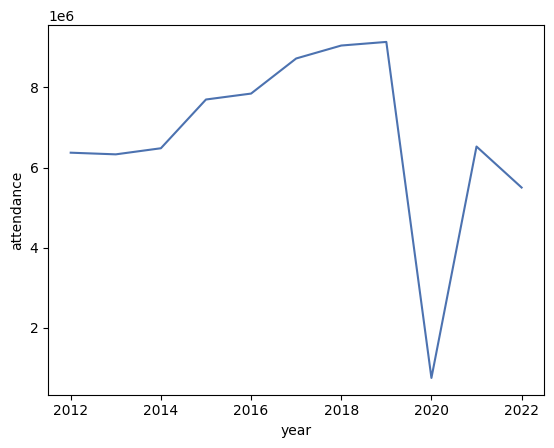

In [220]:
sns.lineplot(x= 'year', y = 'attendance', data = total_mls_attendance)

In [221]:
home_attendance = mls_data.groupby(['home', 'year'])['attendance'].sum().reset_index()
home_attendance

,home,year,attendance
0,Atlanta United FC,2017,886625
1,Atlanta United FC,2018,1114594
2,Atlanta United FC,2019,1044339
3,Atlanta United FC,2020,81580
4,Atlanta United FC,2021,747386
...,...,...,...
238,Vancouver Whitecaps,2018,373089
239,Vancouver Whitecaps,2019,331745
240,Vancouver Whitecaps,2020,22120
241,Vancouver Whitecaps,2021,49149


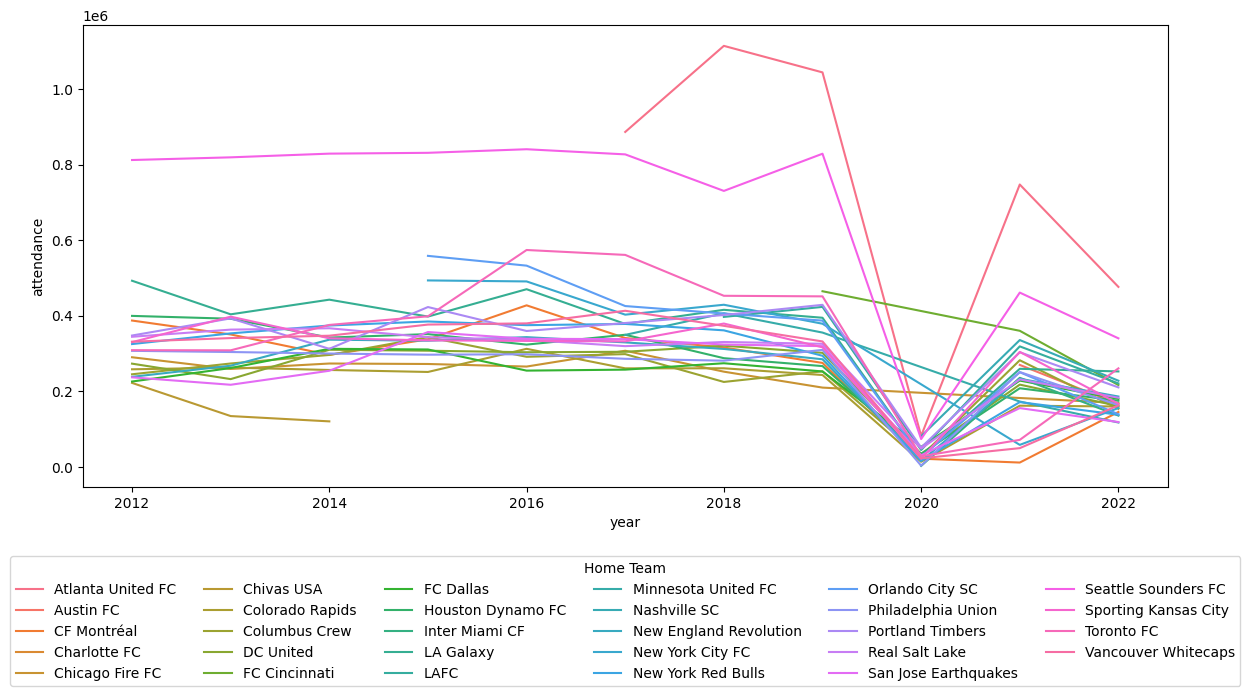

In [259]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = 'year', y = 'attendance', hue = 'home', data = home_attendance)



plt.legend(
    title='Home Team',
    bbox_to_anchor=(.5, -.15),
    loc='upper center',
    borderaxespad=-0,
    ncol=6
)


plt.show()



In [223]:
#Top ten teams with the highest attendance in the MLS since 2012
home_attendance = mls_data.groupby(['home'])['attendance'].sum().reset_index()

sorted_attendance = home_attendance.sort_values(by='attendance', ascending=False).head(10)
print(sorted_attendance.to_string(index=False))

                home  attendance
 Seattle Sounders FC     7393812
   Atlanta United FC     4350759
           LA Galaxy     3932418
          Toronto FC     3788469
    Portland Timbers     3609798
Sporting Kansas City     3254681
      Real Salt Lake     3189485
  New York Red Bulls     3168800
   Houston Dynamo FC     3127633
 Vancouver Whitecaps     3126247


In [224]:
avg_att = home_attendance.groupby('home')['attendance'].mean().reset_index()

avg_att['attendance'] = avg_att['attendance'].round(0).astype(int)

sorted_avg_att = avg_att.sort_values(by='attendance', ascending=False).head(10)

print(sorted_avg_att.to_string(index=False))


                home  attendance
 Seattle Sounders FC     7393812
   Atlanta United FC     4350759
           LA Galaxy     3932418
          Toronto FC     3788469
    Portland Timbers     3609798
Sporting Kansas City     3254681
      Real Salt Lake     3189485
  New York Red Bulls     3168800
   Houston Dynamo FC     3127633
 Vancouver Whitecaps     3126247


<ipython-input-225-f40fbf5e24e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_avg_att, x='attendance', y='home', palette='coolwarm')


<Axes: xlabel='attendance', ylabel='home'>

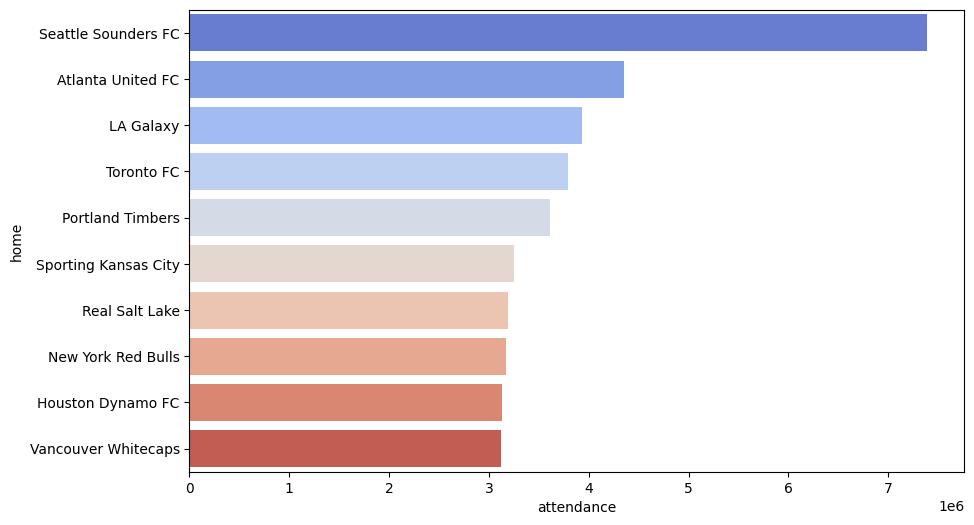

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_avg_att, x='attendance', y='home', palette='coolwarm')


In [226]:
avg_att = home_attendance.groupby('home')['attendance'].mean().reset_index()

avg_att['attendance'] = avg_att['attendance'].round(0).astype(int)

lowest_avg_att = avg_att.sort_values(by='attendance', ascending=True).head(10)

print(lowest_avg_att.to_string(index=False))

               home  attendance
       Charlotte FC      327635
     Inter Miami CF      372978
          Austin FC      435498
         Chivas USA      476112
       Nashville SC      643942
      FC Cincinnati     1040988
Minnesota United FC     1400340
               LAFC     1403492
   New York City FC     2407620
    Colorado Rapids     2437923


<ipython-input-227-03116a5b2e92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_avg_att, x='attendance', y='home', palette='RdBu')


<Axes: xlabel='attendance', ylabel='home'>

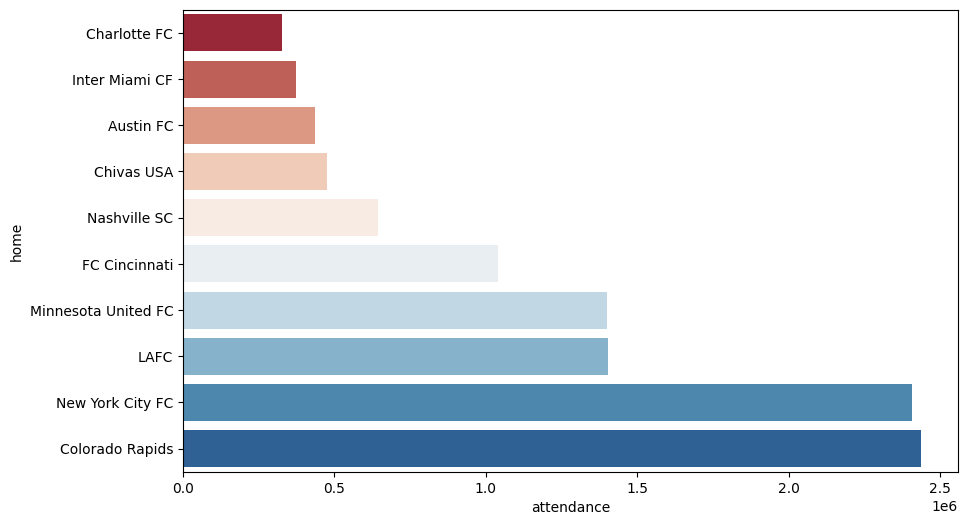

In [227]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_avg_att, x='attendance', y='home', palette='RdBu')


In [228]:
years_in_mls = mls_data.groupby('home')['year'].nunique().reset_index()

years_in_mls = years_in_mls.rename(columns={'year': 'years_in_league'})

sorted_years = years_in_mls.sort_values(by='years_in_league', ascending=True)

print(sorted_years.to_string(index=False))

                  home  years_in_league
          Charlotte FC                1
             Austin FC                2
          Nashville SC                3
            Chivas USA                3
        Inter Miami CF                3
         FC Cincinnati                3
                  LAFC                5
   Minnesota United FC                5
     Atlanta United FC                6
      New York City FC                7
       Orlando City SC                8
       Chicago Fire FC               10
  Sporting Kansas City               11
   Seattle Sounders FC               11
  San Jose Earthquakes               11
        Real Salt Lake               11
      Portland Timbers               11
    Philadelphia Union               11
    New York Red Bulls               11
         Columbus Crew               11
New England Revolution               11
           CF Montréal               11
            Toronto FC               11
             LA Galaxy               11


<ipython-input-229-2b01e76e5a8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= sorted_years, x='years_in_league', y='home', palette='Reds')


<Axes: xlabel='years_in_league', ylabel='home'>

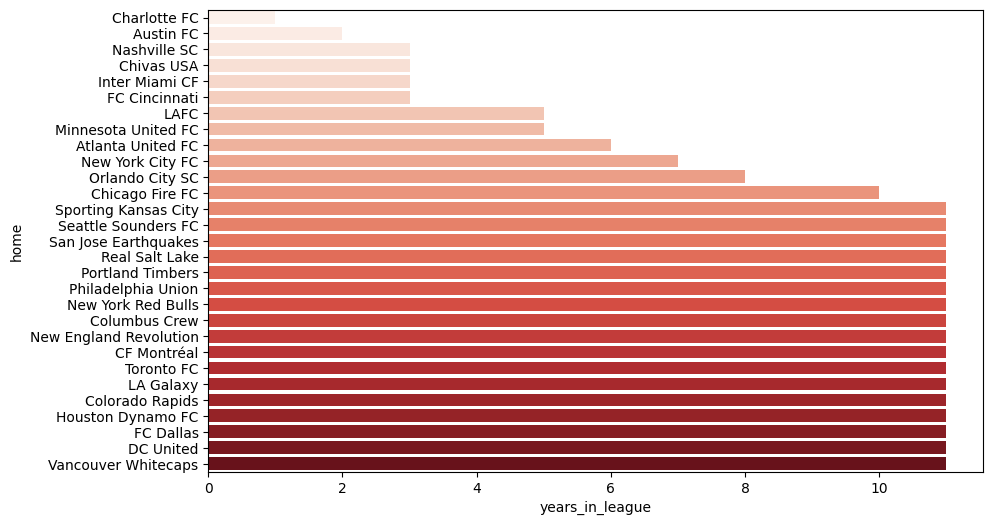

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(data= sorted_years, x='years_in_league', y='home', palette='Reds')

In [250]:
total_mls_attendance = mls_data.groupby('year')['attendance'].sum().reset_index()
total_mls_attendance['attendance_change'] = total_mls_attendance['attendance'].round(0).astype(int)

# Calculating the percentage change in attendance
total_mls_attendance['attendance_percentage_change'] = total_mls_attendance['attendance'].round(0).astype(int).pct_change() * 100

print(total_mls_attendance)


    year  attendance  attendance_change  attendance_percentage_change
0   2012     6372083            6372083                           NaN
1   2013     6330764            6330764                     -0.648438
2   2014     6482859            6482859                      2.402475
3   2015     7699858            7699858                     18.772566
4   2016     7847746            7847746                      1.920659
5   2017     8723700            8723700                     11.161855
6   2018     9047014            9047014                      3.706157
7   2019     9137060            9137060                      0.995312
8   2020      750174             750174                    -91.789766
9   2021     6525984            6525984                    769.929376
10  2022     5502239            5502239                    -15.687213


In [239]:
home_attendance = mls_data.groupby(['home', 'year'])['attendance'].agg(['sum', 'mean', 'min', 'max']).reset_index()
Chicago = home_attendance[home_attendance['home'] == 'Chicago Fire FC']
Chicago

,home,year,sum,mean,min,max
20,Chicago Fire FC,2012,289870,16103.888889,10489,20563
21,Chicago Fire FC,2013,258880,15228.235294,9723,19889
22,Chicago Fire FC,2014,273293,16076.058824,12699,18776
23,Chicago Fire FC,2015,272043,16002.529412,11196,20280
24,Chicago Fire FC,2016,265234,15602.000000,12073,18976
25,Chicago Fire FC,2017,307158,17064.333333,11244,21891
26,Chicago Fire FC,2018,251708,14806.352941,8551,21915
27,Chicago Fire FC,2019,209516,12324.470588,6074,18232
28,Chicago Fire FC,2021,181949,10702.882353,5593,31308
29,Chicago Fire FC,2022,168921,15356.454545,9352,30282


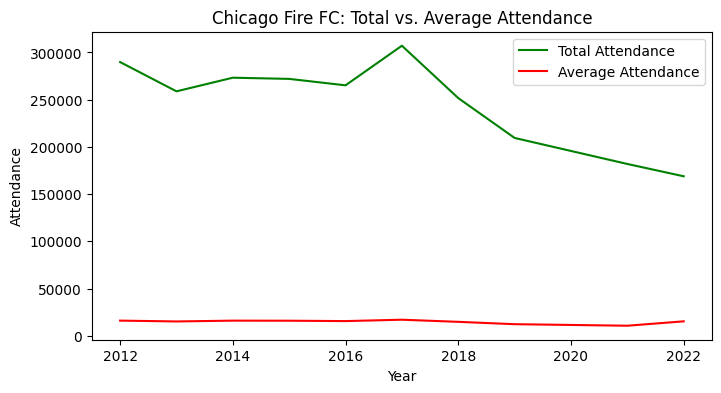

In [263]:
# Plot total and average attendance over years for Chicago Fire FC
plt.figure(figsize=(8, 4))
sns.lineplot(data=Chicago, x='year', y='sum', label='Total Attendance', color='green')
sns.lineplot(data=Chicago, x='year', y='mean', label='Average Attendance', color='red')

plt.title('Chicago Fire FC: Total vs. Average Attendance')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend()
plt.show()

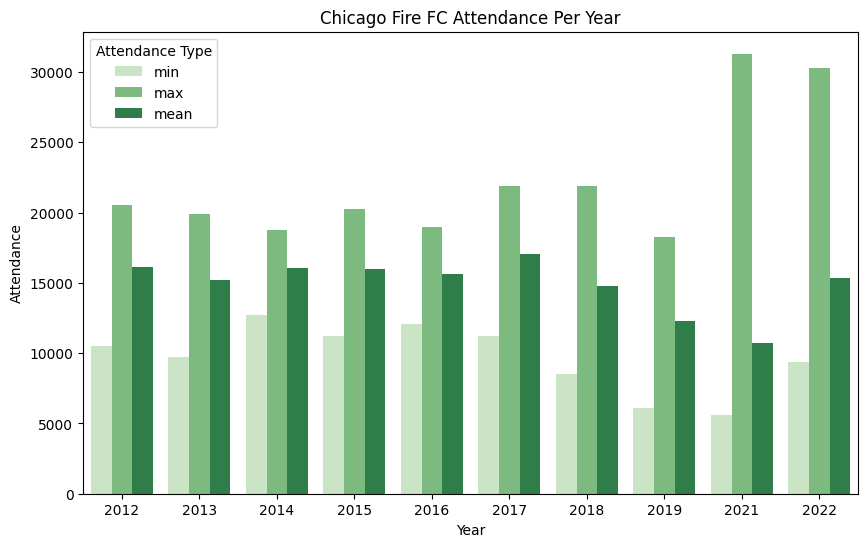

In [262]:
Chicago_melted = Chicago.melt(id_vars='year', value_vars=['min', 'max', 'mean'],
                              var_name='Attendance Type', value_name='Attendance')

plt.figure(figsize=(10, 6))
sns.barplot(data=Chicago_melted, x='year', y='Attendance', hue='Attendance Type', palette='Greens')

plt.title('Chicago Fire FC Attendance Per Year')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend(title='Attendance Type')
plt.show()

In [270]:

chicago_fire_data = mls_data[mls_data['home'] == 'Chicago Fire FC']

max_attendance_per_year = chicago_fire_data.loc[chicago_fire_data.groupby('year')['attendance'].idxmax()]

max_attendance_per_year = max_attendance_per_year[['year', 'attendance', 'away']]

print(max_attendance_per_year.to_string(index=False))


 year  attendance                   away
 2012       20563              LA Galaxy
 2013       19889             Toronto FC
 2014       18776      Houston Dynamo FC
 2015       20280        Orlando City SC
 2016       18976 New England Revolution
 2017       21891             Toronto FC
 2018       21915              LA Galaxy
 2019       18232              DC United
 2021       31308         Real Salt Lake
 2022       30282              LA Galaxy


In [273]:
chicago_fire_data = mls_data[mls_data['home'] == 'Chicago Fire FC']

max_attendance_per_year = chicago_fire_data.loc[chicago_fire_data.groupby('year')['attendance'].idxmax()]

max_attendance_per_year = max_attendance_per_year[['year', 'attendance', 'away']]

max_attendance_per_year = max_attendance_per_year.sort_values(by='attendance', ascending=False)

print(max_attendance_per_year.to_string(index=False))

 year  attendance                   away
 2021       31308         Real Salt Lake
 2022       30282              LA Galaxy
 2018       21915              LA Galaxy
 2017       21891             Toronto FC
 2012       20563              LA Galaxy
 2015       20280        Orlando City SC
 2013       19889             Toronto FC
 2016       18976 New England Revolution
 2014       18776      Houston Dynamo FC
 2019       18232              DC United
